In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import seaborn as sns

# Exercise 0

In [2]:
a = np.arange(1, 101)
b = np.arange(1, 100, 2)
c = np.linspace(-np.pi, np.pi, 201)
d = np.concatenate((np.linspace(-np.pi, -np.pi / 100, 100), np.linspace(np.pi / 100, np.pi, 100)))
e = np.clip(np.sin(a), 0, None)
A = np.arange(1, 101).reshape(10, 10) 
B = (
    np.diagflat(np.arange(1,101)) +
    np.diagflat(np.arange(1,100), k=-1) + 
    np.diagflat(np.arange(1,100), k=1)
    )
C = np.triu(np.ones(5))
D1 = np.cumsum(np.arange(1, 101).astype('float'))[np.newaxis, :]
D2 = np.cumprod(np.arange(1,101).astype('float'))[np.newaxis, :]
D = np.vstack( (D1, D2))
E1 = np.arange(1, 101)
E2 = np.arange(1, 101)[:, np.newaxis]
E = (E2 % E1 == 0).astype('int')

# Exercise 1

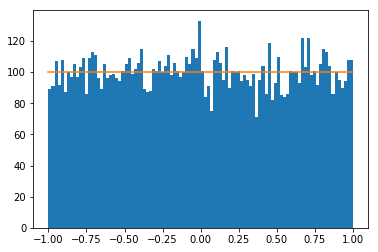

In [3]:
from scipy.stats import uniform
def dist_uniform(SIZE):
    a1 = np.random.uniform(low=-1.0,size=SIZE)
    n, _, plot = plt.hist(a1, bins=100)
    x = np.linspace(-1,1, 100)
    dest = lambda x: 100
    plt.plot(x, x * 0 + np.mean(n))
dist_uniform(10000)

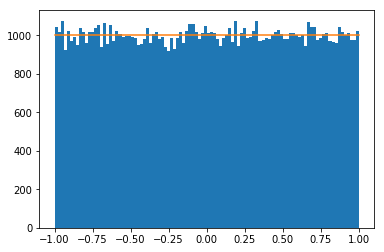

In [4]:
dist_uniform(100000)

/home/kku/.miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


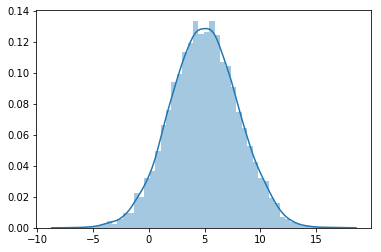

In [5]:
def dist_normal(SIZE):
    a1 = np.random.randn(SIZE) * 3 + 5
    sns.distplot(a1)
dist_normal(10000)

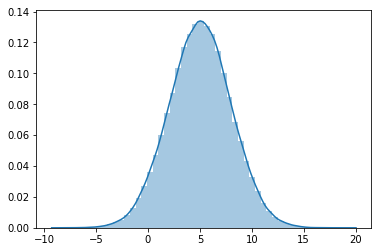

In [6]:
dist_normal(100000)

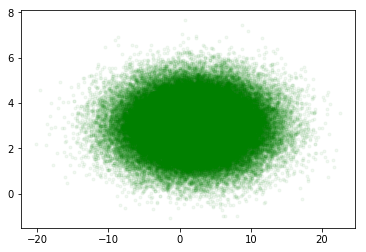

In [7]:
SIZE = 100000
mu1, std1, mu2, std2 = 2, 5, 3, 1
a1 = np.vstack(
    (np.random.randn(SIZE) * std1 + mu1,
    np.random.randn(SIZE) * std2 + mu2)
)
plt.plot(a1[0], a1[-1], 'g.', alpha=0.05)

In [8]:
np.mean(a1[0] > a1[-1])

0.42163

In [9]:
scipy.integrate.quad(
#     lambda t: np.exp(-(t - (mu1 - mu2) ** 2) / (2 * std1 +std2)) / np.sqrt(2 * np.pi * (std1 + std2)),
    lambda t: scipy.stats.norm.pdf(t, mu1 - mu2, std1 + std2),
    -np.inf,
    0
)

(0.5661838326109038, 8.625723533467043e-10)

# Excercise 2

In [10]:
# a)
d = 100
x, y, w = np.random.rand(d,1), np.random.rand(d,1), np.random.rand(d,1)

length = np.sqrt(x.T @ x)
weigth_mean = (x.T @ w / np.sum(w))
euklidian_dist = np.sqrt((x-y).T @ (x-y))
scalar_product = (x.T @ y)

In [11]:
N = 1000
X = np.random.rand(d,N)

length = np.sqrt((X**2).sum(axis=0))
weigth_mean = np.dot(X.T,w)/np.sum(w)
euklidian_dist = np.sqrt(np.sum((X-y)**2, axis=0))
scalar_product = X.T @ y

# Excercise 3

In [12]:
from sklearn import datasets
iris = datasets.load_iris()
# iris.data
# iris.target
# iris.feature_names
# iris.target_names

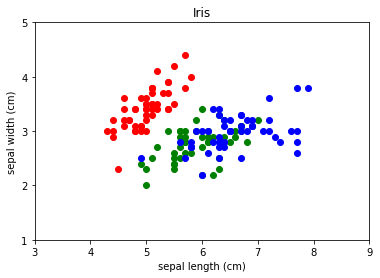

In [13]:
import matplotlib
from matplotlib.ticker import MaxNLocator
x = 'sepal length (cm)'
y = 'sepal width (cm)'
ax = plt.figure().gca()
for i in range(np.max(iris.target) + 1):
    ids = iris.target == i
    ax.scatter(
        iris.data[ids, iris.feature_names.index(x)],
        iris.data[ids, iris.feature_names.index(y)],
        color= 'rgb'[i],
        marker='o'
    )
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('Iris')
plt.xlabel(x)
plt.xlim(3,9)
plt.ylabel(y)
plt.ylim(1,5)
plt.savefig('nazwa')

# Excersize 4


In [14]:
def f(xs):
    return 2 * xs - 8

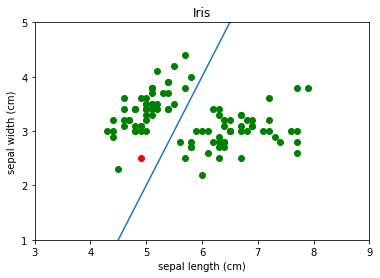

In [15]:
def show_plot(file_name):
    import matplotlib
    from matplotlib.ticker import MaxNLocator
    x = 'sepal length (cm)'
    y = 'sepal width (cm)'
    ax = plt.figure().gca()
    for i in range(np.max(iris.target) + 1):
        if iris.target_names[i] == 'versicolor':
            continue
        ids = iris.target == i
        our_data = iris.data[ids]
        upper = our_data[:, 1] > f(our_data[:, 0])
        lower = upper ^ True
        positive, false_positive = (upper, lower) if np.sum(upper) > np.sum(lower) else (lower, upper)
        ax.scatter(
            our_data[positive, iris.feature_names.index(x)],
            our_data[positive, iris.feature_names.index(y)],
            color= 'g', 
            marker='o'
        )
        ax.scatter(
            our_data[false_positive, iris.feature_names.index(x)],
            our_data[false_positive, iris.feature_names.index(y)],
            color= 'r', 
            marker='o'
        )
    xs = np.linspace(3,9) 
    # print(2 * xs + 3)
    ax.plot(xs, f(xs))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.title('Iris')
    plt.xlabel(x)
    plt.xlim(3,9)
    plt.ylabel(y)
    plt.ylim(1,5)
    plt.savefig(file_name)
show_plot('zadania2a.png')

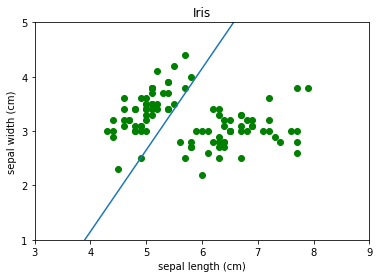

In [16]:
def f(xs):
    return (1.5 * xs) - 4.85
show_plot('zadania2b.png')

# Excercise 5

8.497058314499203

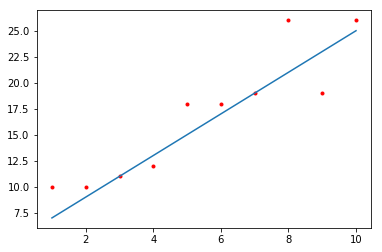

In [17]:
[x,y] = list(zip((1,  10),  (2,  10), (3, 11), (4, 12), (5, 18), (6, 18), (7, 19), (8, 26), (9, 19), (10, 26)))
x, y = np.array(x), np.array(y)
plt.scatter(x,y, c='r', marker='.')

x1 = np.linspace(1,10)
a=2
b=5
y1 = a*x1+b
plt.plot(x1, y1)
plt.savefig('zadanie3a.png')
p1 = np.array(x1[0], y1[0]) 
p2 = np.array(x1[-1], y1[-1]) 

sum(np.abs(np.array([-a,1]) @ np.array([x,y]) - b) / np.sqrt(1 + a ** 2))

8.243711861137415

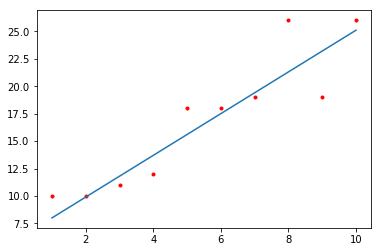

In [18]:
[x,y] = list(zip((1,  10),  (2,  10), (3, 11), (4, 12), (5, 18), (6, 18), (7, 19), (8, 26), (9, 19), (10, 26)))
x, y = np.array(x), np.array(y)

x1 = np.linspace(1,10)
a=1.9
b=6.1
y1 = a*x1+b
plt.scatter(x,y,c='r', marker='.')
plt.plot(x1, y1)
plt.savefig('zadanie3b.png')

sum(np.abs(np.array([-a,1]) @ np.array([x,y]) - b) / np.sqrt(1 + a ** 2))

# Excercise 6 and 7

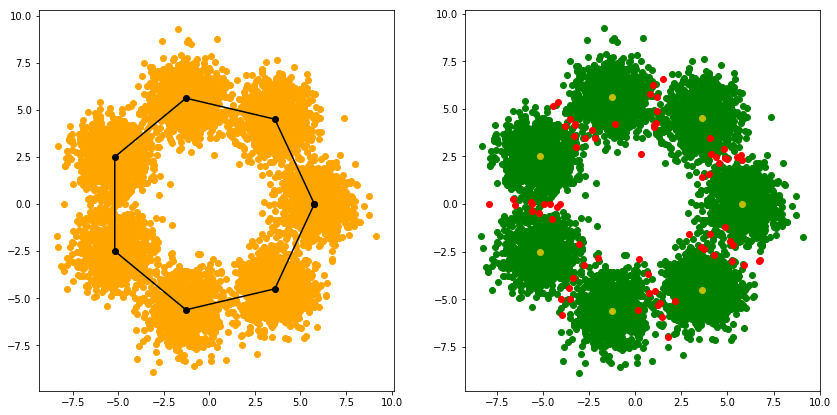

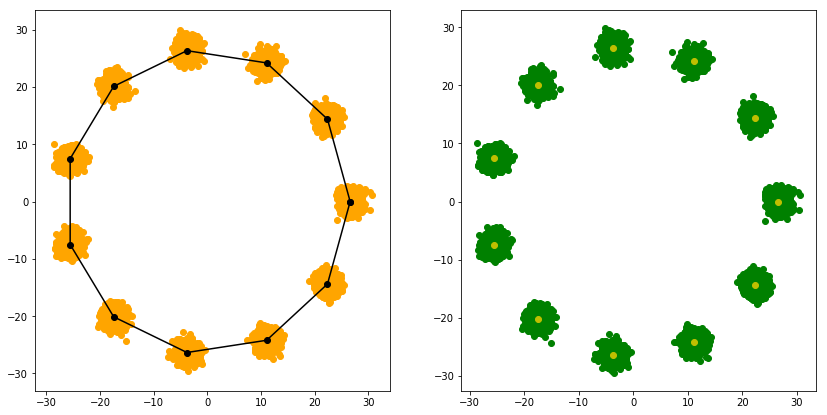

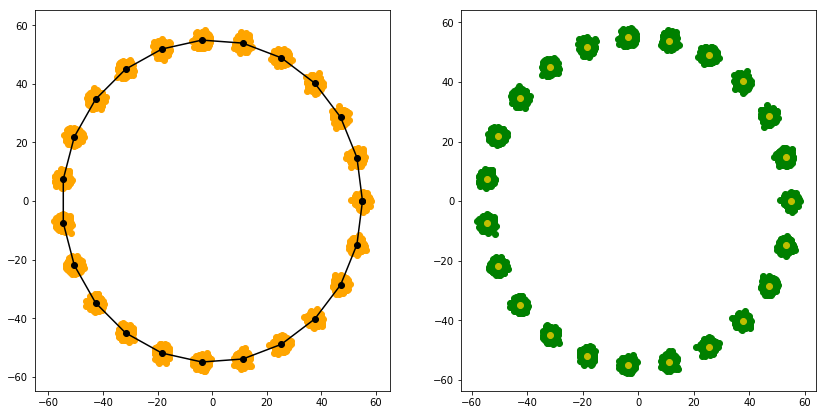

In [19]:
K = 5
d = 10
for K,d in [(7,5),(11,15),(23,15)]:
    plt.figure(figsize=(14, 7))
    plt.subplot(1,2,1)
    angles = np.linspace(0, 2*np.pi, K+1)
    edge = d/(2*np.sin(angles[1]/2))

    rotationMtrx = np.array([[np.cos(angles), -np.sin(angles)], [np.sin(angles), np.cos(angles)]]).T
    v = np.array([[edge, 0]])

    ver = np.matmul(rotationMtrx, v.T)
    plt.plot(ver[:, 0], ver[:, 1], c='black', marker='o')
#     Removing duplicated last elemnt (for beautiful plot)
    ver = ver[:-1]
    
    points = np.random.randn(K,2, 1000) + ver

    plt.scatter(points[:,0],points[:,1], c='orange')
    
#     Excersize7
    plt.subplot(1,2,2)
    
    samples = points.transpose(0,2,1)
    centers = ver.reshape(K,2)
    a = np.sum(samples ** 2, axis=-1)
    b = np.sum(centers ** 2, axis=-1)
    c = -2 * (samples @ centers.T)
    
    dists = c + a[:,:,np.newaxis] + b
    ids = np.argmin(dists, axis=-1)
    
    positive = ids == np.arange(0,K).reshape(K,1)
    false_positive = ids != np.arange(0,K).reshape(K,1)

    plt.scatter(samples[positive][:,0], samples[positive][:,1], c='g')
    plt.scatter(samples[false_positive][:,0], samples[false_positive][:,1], c='r')
    plt.scatter(ver[:, 0], ver[:, 1], c='y')
    plt.show()